In [60]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# **Загрузите выбранный датасет и выполните предварительную обработку данных.**

In [61]:
df = pd.read_csv('diabetes.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


 **Визуализация**

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

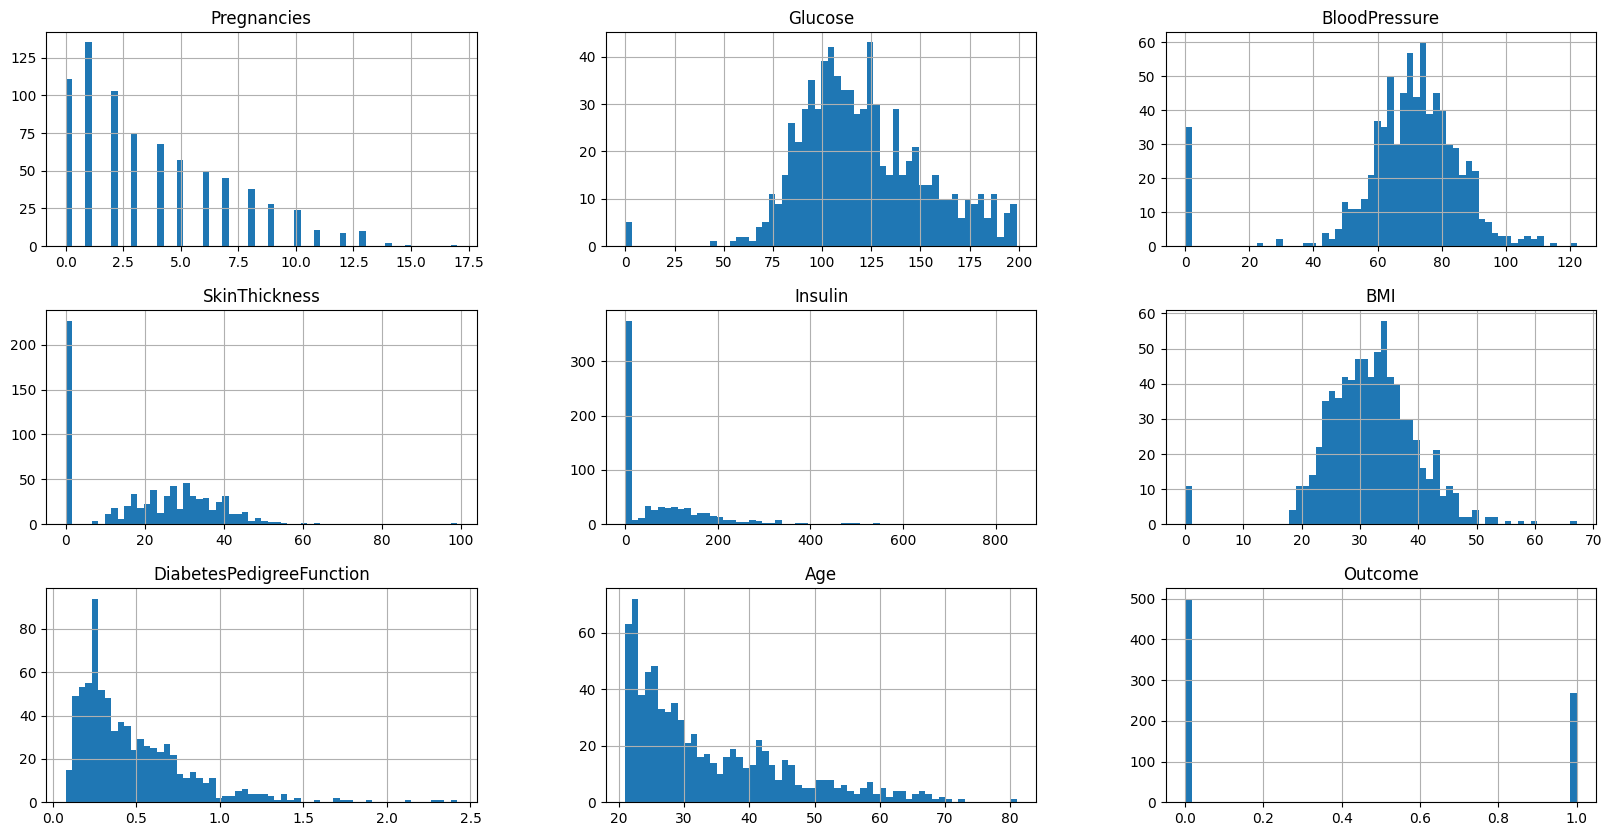

In [62]:
#Посмотрим на данные
df.hist(bins=60, figsize=(20, 10))

 **Нормализация**

In [63]:
min_max_scaler = lambda x: (x - np.min(x)) / (np.max(x) - np.min(x))
df = df.apply(min_max_scaler, axis=0)
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438,0.207439,0.094326,0.476790,0.168179,0.204015,0.348958
std,0.198210,0.160666,0.158654,0.161134,0.136222,0.117499,0.141473,0.196004,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197,0.000000,0.000000,0.406855,0.070773,0.050000,0.000000
50%,0.176471,0.587940,0.590164,0.232323,0.036052,0.476900,0.125747,0.133333,0.000000
75%,0.352941,0.704774,0.655738,0.323232,0.150414,0.545455,0.234095,0.333333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# **Разделите данные на обучающий и тестовый наборы в соотношении, которое вы считаете подходящим**

In [64]:
# Разделение на обучающий и тестовый наборы
def train_test_split_custom(X, y, test_size=0.2):
    num_samples = X.shape[0]
    num_test_samples = int(test_size * num_samples)

    # Генерация случайных индексов для тестового набора
    test_indices = np.random.choice(num_samples, num_test_samples, replace=False)

    # Индексы для обучающего набора
    train_indices = np.setdiff1d(np.arange(num_samples), test_indices)

    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]

    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split_custom(df.drop(["Outcome"], axis=1).to_numpy(), df["Outcome"].to_numpy(),test_size=0.2)

# **Реализуйте логистическую регрессию "с нуля" без использования сторонних библиотек, кроме NumPy и Pandas.**

In [65]:
# Гипотеза (sigmoid function)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Функция потерь (log loss)
def log_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

# Метод обучения с градиентным спуском
def train_with_gradient_descent(X, y, learning_rate, num_iterations):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    for i in range(num_iterations):
        z = np.dot(X, weights) + bias #Скалярное произведение плюс смещение
        y_pred = sigmoid(z)

        # Вычисление градиента
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)

        # Обновление параметров с использованием градиентного спуска (Градиентный шаг)
        weights -= learning_rate * dw
        bias -= learning_rate * db

        if i % 100 == 0:
            # Расчет функции потерь и вывод
            cost = log_loss(y, y_pred)
            print(f"Iteration {i}: Loss = {cost:.6f}")

    theta = {"weights": weights, "bias": bias}
    return theta

# Метод обучения с использованием оптимизации Ньютона
def train_with_newton_method(X, y, num_iterations, learning_rate=0):
    m, n = X.shape
    weights = np.zeros(n)
    bias = 0

    for i in range(num_iterations):
        z = np.dot(X, weights) + bias
        y_pred = sigmoid(z)

        # Вычисление градиента
        dw = (1 / m) * np.dot(X.T, (y_pred - y))
        db = (1 / m) * np.sum(y_pred - y)

        # Вычисление гессиана (вторые производные)
        diagonal = y_pred * (1 - y_pred)
        hessian = (1 / m) * (X.T @ (diagonal * X.T).T)

        # Обновление параметров с использованием метода Ньютона
        weights -= np.linalg.inv(hessian) @ dw
        bias -= db

        if i % 500 == 0:
            # Расчет функции потерь и вывод
            cost = log_loss(y, y_pred)
            print(f"Iteration {i}: Loss = {cost:.6f}")

    theta = {"weights": weights, "bias": bias}
    return theta

# Прогноз
# Предсказание на тестовых данных
def predict(X, theta):
    weights = theta["weights"]
    bias = theta["bias"]
    z = np.dot(X, weights) + bias
    y_pred = sigmoid(z)
    return (y_pred > 0.5).astype(int)

# Вычисление точности модели
def get_accuracy(y_pred, y_test):
    return np.mean(y_pred == y_test)

# Вычисление точности (precision)
def get_precision(y_pred, y_test):
    return np.sum((y_pred == 1) & (y_test == 1)) / np.sum(y_pred == 1)

# Вычисление полноты (recall)
def get_recall(y_pred, y_test):
    return np.sum((y_pred == 1) & (y_test == 1)) / np.sum(y_test == 1)

# Вычисление F1 (F1 score)
def get_f1_score(precision, recall):
    return 2 * (precision * recall) / (precision + recall)

# **Выполнение**

In [66]:
LEARNING_RATES = [0.01, 0.1, 0.2, 0.25, 0.5]
NUM_ITERATIONS_LIST = [100, 500, 1000]
METHODS = [train_with_newton_method, train_with_gradient_descent]
best_num_iter = NUM_ITERATIONS_LIST[0]
best_learning_rate = LEARNING_RATES[0]
best_method = None
best_accuracy = 0
for iteration in NUM_ITERATIONS_LIST:
    for rate in LEARNING_RATES:
        for method in METHODS:
            print(
                f'\t\n|Model with params: num_iterations = {iteration}, learning rate = {rate}, method = {method.__name__}|')
            theta = method(X_train, y_train, learning_rate=rate, num_iterations=iteration)
            y_pred = predict(X_test, theta)
            accuracy = get_accuracy(y_pred, y_test)
            precision = get_precision(y_pred, y_test)
            recall = get_recall(y_pred, y_test)
            f1_score = get_f1_score(precision, recall)
            if best_accuracy < accuracy:
                best_accuracy = accuracy
                best_method = method
                best_num_iter = iteration
                best_learning_rate = rate

            print(f"Accuracy: {accuracy:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1-Score: {f1_score:.4f}")

print(f'\n\t\tBest parameters:\n'
      f'\tLearning rate: {best_learning_rate if best_method.__name__ != "train_with_newton_method" else "-"}\n'
      f'\tMethod: {best_method.__name__}\n'
      f'\tIterations: {best_num_iter}\n'
      f'\tAccuracy: {best_accuracy}')


	
|Model with params: num_iterations = 100, learning rate = 0.01, method = train_with_newton_method|
Iteration 0: Loss = 0.693147
Accuracy: 0.7712
Precision: 0.6346
Recall: 0.6735
F1-Score: 0.6535
	
|Model with params: num_iterations = 100, learning rate = 0.01, method = train_with_gradient_descent|
Iteration 0: Loss = 0.693147
Accuracy: 0.6797
Precision: nan
Recall: 0.0000
F1-Score: nan
	
|Model with params: num_iterations = 100, learning rate = 0.1, method = train_with_newton_method|
Iteration 0: Loss = 0.693147
Accuracy: 0.7712
Precision: 0.6346
Recall: 0.6735
F1-Score: 0.6535
	
|Model with params: num_iterations = 100, learning rate = 0.1, method = train_with_gradient_descent|
Iteration 0: Loss = 0.693147
Accuracy: 0.6797
Precision: nan
Recall: 0.0000
F1-Score: nan
	
|Model with params: num_iterations = 100, learning rate = 0.2, method = train_with_newton_method|
Iteration 0: Loss = 0.693147
Accuracy: 0.7712
Precision: 0.6346
Recall: 0.6735
F1-Score: 0.6535
	
|Model with params: nu

 **Сравнение с sklearn**

In [67]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8235
Precision: 0.8269
Recall: 0.8235
F1-Score: 0.8249


# **ВЫВОДЫ**

В ходе работы я реализовал метод логистической регрессии средствами языка Python и библиотек NumPy и Pandas. Были построены модели с различными параметрами. Выбрана модель с наилучшими показателями производительности. При варьировании гиперпараметров возникали различные ситуации, соответственно, различные метрики выходили. Однако, стоит заметить, что метод градиентного спуска давал различные результаты в течение работы. В отличие от него, метод оптимизации Ньютона всегда давал приблизительно равные значения, был более стаблильным. Accuracy реализованной модели превысила accuracy sklearn модели.